# Predict students' dropout and academic success

### Summary

In our study, we developed machine learning models, including SVM, Random Forest, and Logistic Regression (with L1 and L2 regularization), to predict the likelihood of student academic dropout in higher education. Due to a high number of features and their inter-correlations, our models initially exhibited overfitting. To address this, we implemented feature selection techniques (PCA and feature importance analysis) along with model's parameter optimization. The refined models demonstrated improved performance, evidenced by a narrow gap between training and testing accuracy. Among the three, SVM marginally outperformed the others, achieving an accuracy of 80% and an AUC score of 0.89. Nonetheless, there is potential for further enhancement in model performance through additional feature engineering and more extensive parameter tuning.

### Introduction

In the realm of educational analytics, understanding the factors that influence student performance is pivotal for shaping effective pedagogical strategies. Our project delves into this domain, leveraging the rich and multifaceted Student Performance Data Set from the UCI Machine Learning Repository. This dataset, derived from two Portuguese secondary schools, offers a comprehensive view of various personal, social, and academic factors impacting student achievement in Mathematics and Portuguese language courses.

Our objective is to utilize machine learning techniques to analyze and predict student academic outcomes, focusing primarily on identifying key predictors of success and risk factors for academic dropout. Through this analysis, we aim to uncover insights that can guide interventions and support mechanisms to enhance student performance. The dataset's inclusivity of attributes ranging from demographic backgrounds and family information to study habits and lifestyle choices provides a unique opportunity to explore the multifaceted nature of academic success.


### Analysis
#### Data 
The dataset was compiled from two Portuguese schools for secondary education students. It includes data on student grades, demographic, social, and school-related attributes. It's a classification problem. The features it includes such as age, parent's education level, school support, grade, credit and target value.

#### Method
The method we use include Random Forest, Logistic Regression, and SVM. In the landscape of machine learning, three algorithms stand out for their efficacy and versatility: Logistic Regression, Random Forest, and Support Vector Machine (SVM). Logistic Regression excels in binary classification problems by modeling probabilities using a logistic function, offering simplicity and interpretability. On the other hand, Random Forest, an ensemble of decision trees, is renowned for its robustness against overfitting and its prowess in handling large datasets with high dimensionality. It not only provides accurate predictions but also insights into feature importance. Lastly, SVM shines in both classification and regression tasks, especially in high-dimensional spaces. It distinguishes data points with an optimally placed hyperplane, using the kernel trick for effective non-linear classification. These algorithms, each with their unique strengths, are pivotal in solving a diverse array of predictive modeling problems, from simple binary classification to complex high-dimensional data challenges. This is a three class classification problem, thus, we use one-vs-rest method to train the models.

For feature selection, we employed the method of feature importance values and Principal Component Analysis (PCA) to streamline the dimensionality of our feature space. Feature importance, as derived from the Random Forest algorithm, elucidates the extent to which each feature contributes to optimize the objective function, be it Gini Index or Entropy, within Random Forest models. On the other hand, PCA serves as a complementary approach, identifying principal components from our features, thereby facilitating a more focused and efficient representation of the data.

#### Discussion
In our analysis, the final models demonstrated commendable performance, marked by a minimal discrepancy between training and testing results. This consistency is indicative of the models' ability to generalize well to unseen data, a crucial aspect of robust machine learning models. Among the three algorithms employed - Logistic Regression, Random Forest, and Support Vector Machine (SVM) - the performance metrics were closely aligned, suggesting that each model was able to capture the underlying patterns in the data effectively.

However, there remains room for improvement in the models' performance. Further refinement through advanced feature engineering could yield more significant insights from the data, potentially enhancing the models' predictive accuracy. Feature engineering, by uncovering more relevant or representative features, can lead to a more nuanced understanding of the factors influencing student academic dropout. Moreover, meticulous parameter tuning, particularly for algorithms like SVM and Random Forest that are sensitive to specific parameter settings, could further optimize the models.





## EDA-Load Data and Summarize Data Set

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import altair as alt



from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from scipy.stats import randint, uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA


In [2]:
from high_corr_extract import get_high_correlations
from map_int_category import map_int_categories
from plot_numeric import plot_numeric_feature_distribution
from transform_data import transform_data

In [3]:
student_df = pd.read_csv('../data/student.csv')

In [4]:
student_df.head(10)

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   
5               2                39                  1    9991   
6               1                 1                  1    9500   
7               1                18                  4    9254   
8               1                 1                  3    9238   
9               1                 1                  1    9238   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   
5                             0                      19   
6                             1                       1   
7                             1                       1   
8                             1                       1   
9                             1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   
5                           133.1            1                      37   
6                           142.0            1                      19   
7                           119.0            1                      37   
8                           137.0           62                       1   
9                           138.0            1                       1   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   
5                      37  ...                                    0   
6                      38  ...                                    0   
7                      37  ...                                    0   
8                       1  ...                                    0   
9                      19  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   
5                                    5   
6                                    8   
7                                    5   
8                                    6   
9                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   
5                                      17   
6                                       8   
7                                       5   
8                                       7   
9                                      14   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grad

In [5]:
print("The dataset has {} rows and {} columns. The target variable is {}".format(student_df.shape[0], student_df.shape[1], student_df.columns[-1]))

The dataset has 4424 rows and 37 columns. The target variable is Target


In [6]:
student_df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:
train_df_org, test_df_org = train_test_split(student_df, test_size=0.2, random_state = 123)


In [8]:
train_df = train_df_org.copy()
test_df = test_df_org.copy()

In [9]:
train_df.sort_index().head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3539 entries, 563 to 3582
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3539 non-null   int64  
 1   Application mode                                3539 non-null   int64  
 2   Application order                               3539 non-null   int64  
 3   Course                                          3539 non-null   int64  
 4   Daytime/evening attendance	                     3539 non-null   int64  
 5   Previous qualification                          3539 non-null   int64  
 6   Previous qualification (grade)                  3539 non-null   float64
 7   Nacionality                                     3539 non-null   int64  
 8   Mother's qualification                          3539 non-null   int64  
 9   Father's qualification                      

## EDA - Univariate Analysis:

In [11]:
### Map the marital status from code to actual status
### Categorical variable
status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}


train_df = map_int_categories(train_df, 'Marital status', status_mapping)
test_df = map_int_categories(test_df, 'Marital status', status_mapping)

In [12]:
### Map the Course from code to actual Course type easier for interpretation
### Categorical variable

course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

# Apply the mapping
train_df = map_int_categories(train_df, 'Course', course_mapping)
test_df = map_int_categories(test_df, 'Course', course_mapping)


In [13]:
### Map the Course day/night attendance type easier for interpretation
### binary variable

daytime_mapping = {
    0: 'evening',
    1: 'daytime',
}

# Apply the mapping

train_df.rename(columns={'Daytime/evening attendance\t': 'Daytime evening attendance'}, inplace=True)
test_df.rename(columns={'Daytime/evening attendance\t': 'Daytime evening attendance'}, inplace=True)


train_df = map_int_categories(train_df, 'Daytime evening attendance', daytime_mapping)
test_df = map_int_categories(test_df, 'Daytime evening attendance', daytime_mapping)



In [14]:
### Map the nationality from code to actual nationality easier for interpretation
### Categorical variable

nation_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}



train_df = map_int_categories(train_df, 'Nacionality', daytime_mapping)
test_df = map_int_categories(test_df, 'Nacionality', daytime_mapping)

In [15]:

### We divide our columns into numeric and categorical features this is our original version
numeric_features = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 
       'Unemployment rate',
       'Inflation rate', 
       'GDP']
categorical_features = ['Marital status', 
                        'Application mode', 
                        'Course', 
                        'Nacionality', 
                        "Mother's occupation", 
                        "Father's occupation"]
ordinal_features = ['Application order', 
                    'Previous qualification', 
                    "Mother's qualification", 
                    "Father's qualification"]
binary_features = ['Daytime evening attendance', 
                   'Displaced', 
                   'Educational special needs', 
                   'Debtor', 
                   'Tuition fees up to date', 
                   'Gender', 
                   'Scholarship holder', 
                   'International']
drop_features = []
target = "Target"


In [16]:
train_df["Target"].value_counts()

Target
Graduate    1759
Dropout     1144
Enrolled     636
Name: count, dtype: int64

In [17]:
train_df.loc[:, numeric_features].describe()

Previous qualification (grade)  Admission grade  Age at enrollment  \
count                      3539.00000      3539.000000        3539.000000   
mean                        132.52690       126.895112          23.294716   
std                          13.07629        14.283487           7.626113   
min                          95.00000        95.000000          17.000000   
25%                         124.00000       118.000000          19.000000   
50%                         133.10000       126.000000          20.000000   
75%                         140.00000       134.600000          25.000000   
max                         190.00000       190.000000          70.000000   

       Curricular units 1st sem (credited)  \
count                          3539.000000   
mean                              0.710653   
std                               2.374237   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              20.000000   

       Curricular units 1st sem (enrolled)  \
count                          3539.000000   
mean                              6.274654   
std                               2.501048   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 1st sem (evaluations)  \
count                             3539.000000   
mean                                 8.295846   
std                                  4.242949   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 45.000000   

       Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
count                          3539.000000                       3539.000000   
mean                              4.705567                         10.624811   
std                               3.109605                          4.847994   
min                               0.000000                          0.000000   
25%                               3.000000                         11.000000   
50%                               5.000000                         12.285714   
75%                               6.000000                         13.385714   
max                              21.000000                         18.000000   

       Curricular units 1st sem (without evaluations)  \
count                                     3539.000000   
mean                                         0.140718   
std                                          0.708489   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                         12.000000   

       Curricular units 2nd sem (credited)  \
count                          3539.000000   
mean                              0.541113   
std                               1.935854   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          3539.000000   
mean                              6.231421   
std                               2.220177   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                    

In [18]:
train_df['Target'].value_counts()

Target
Graduate    1759
Dropout     1144
Enrolled     636
Name: count, dtype: int64

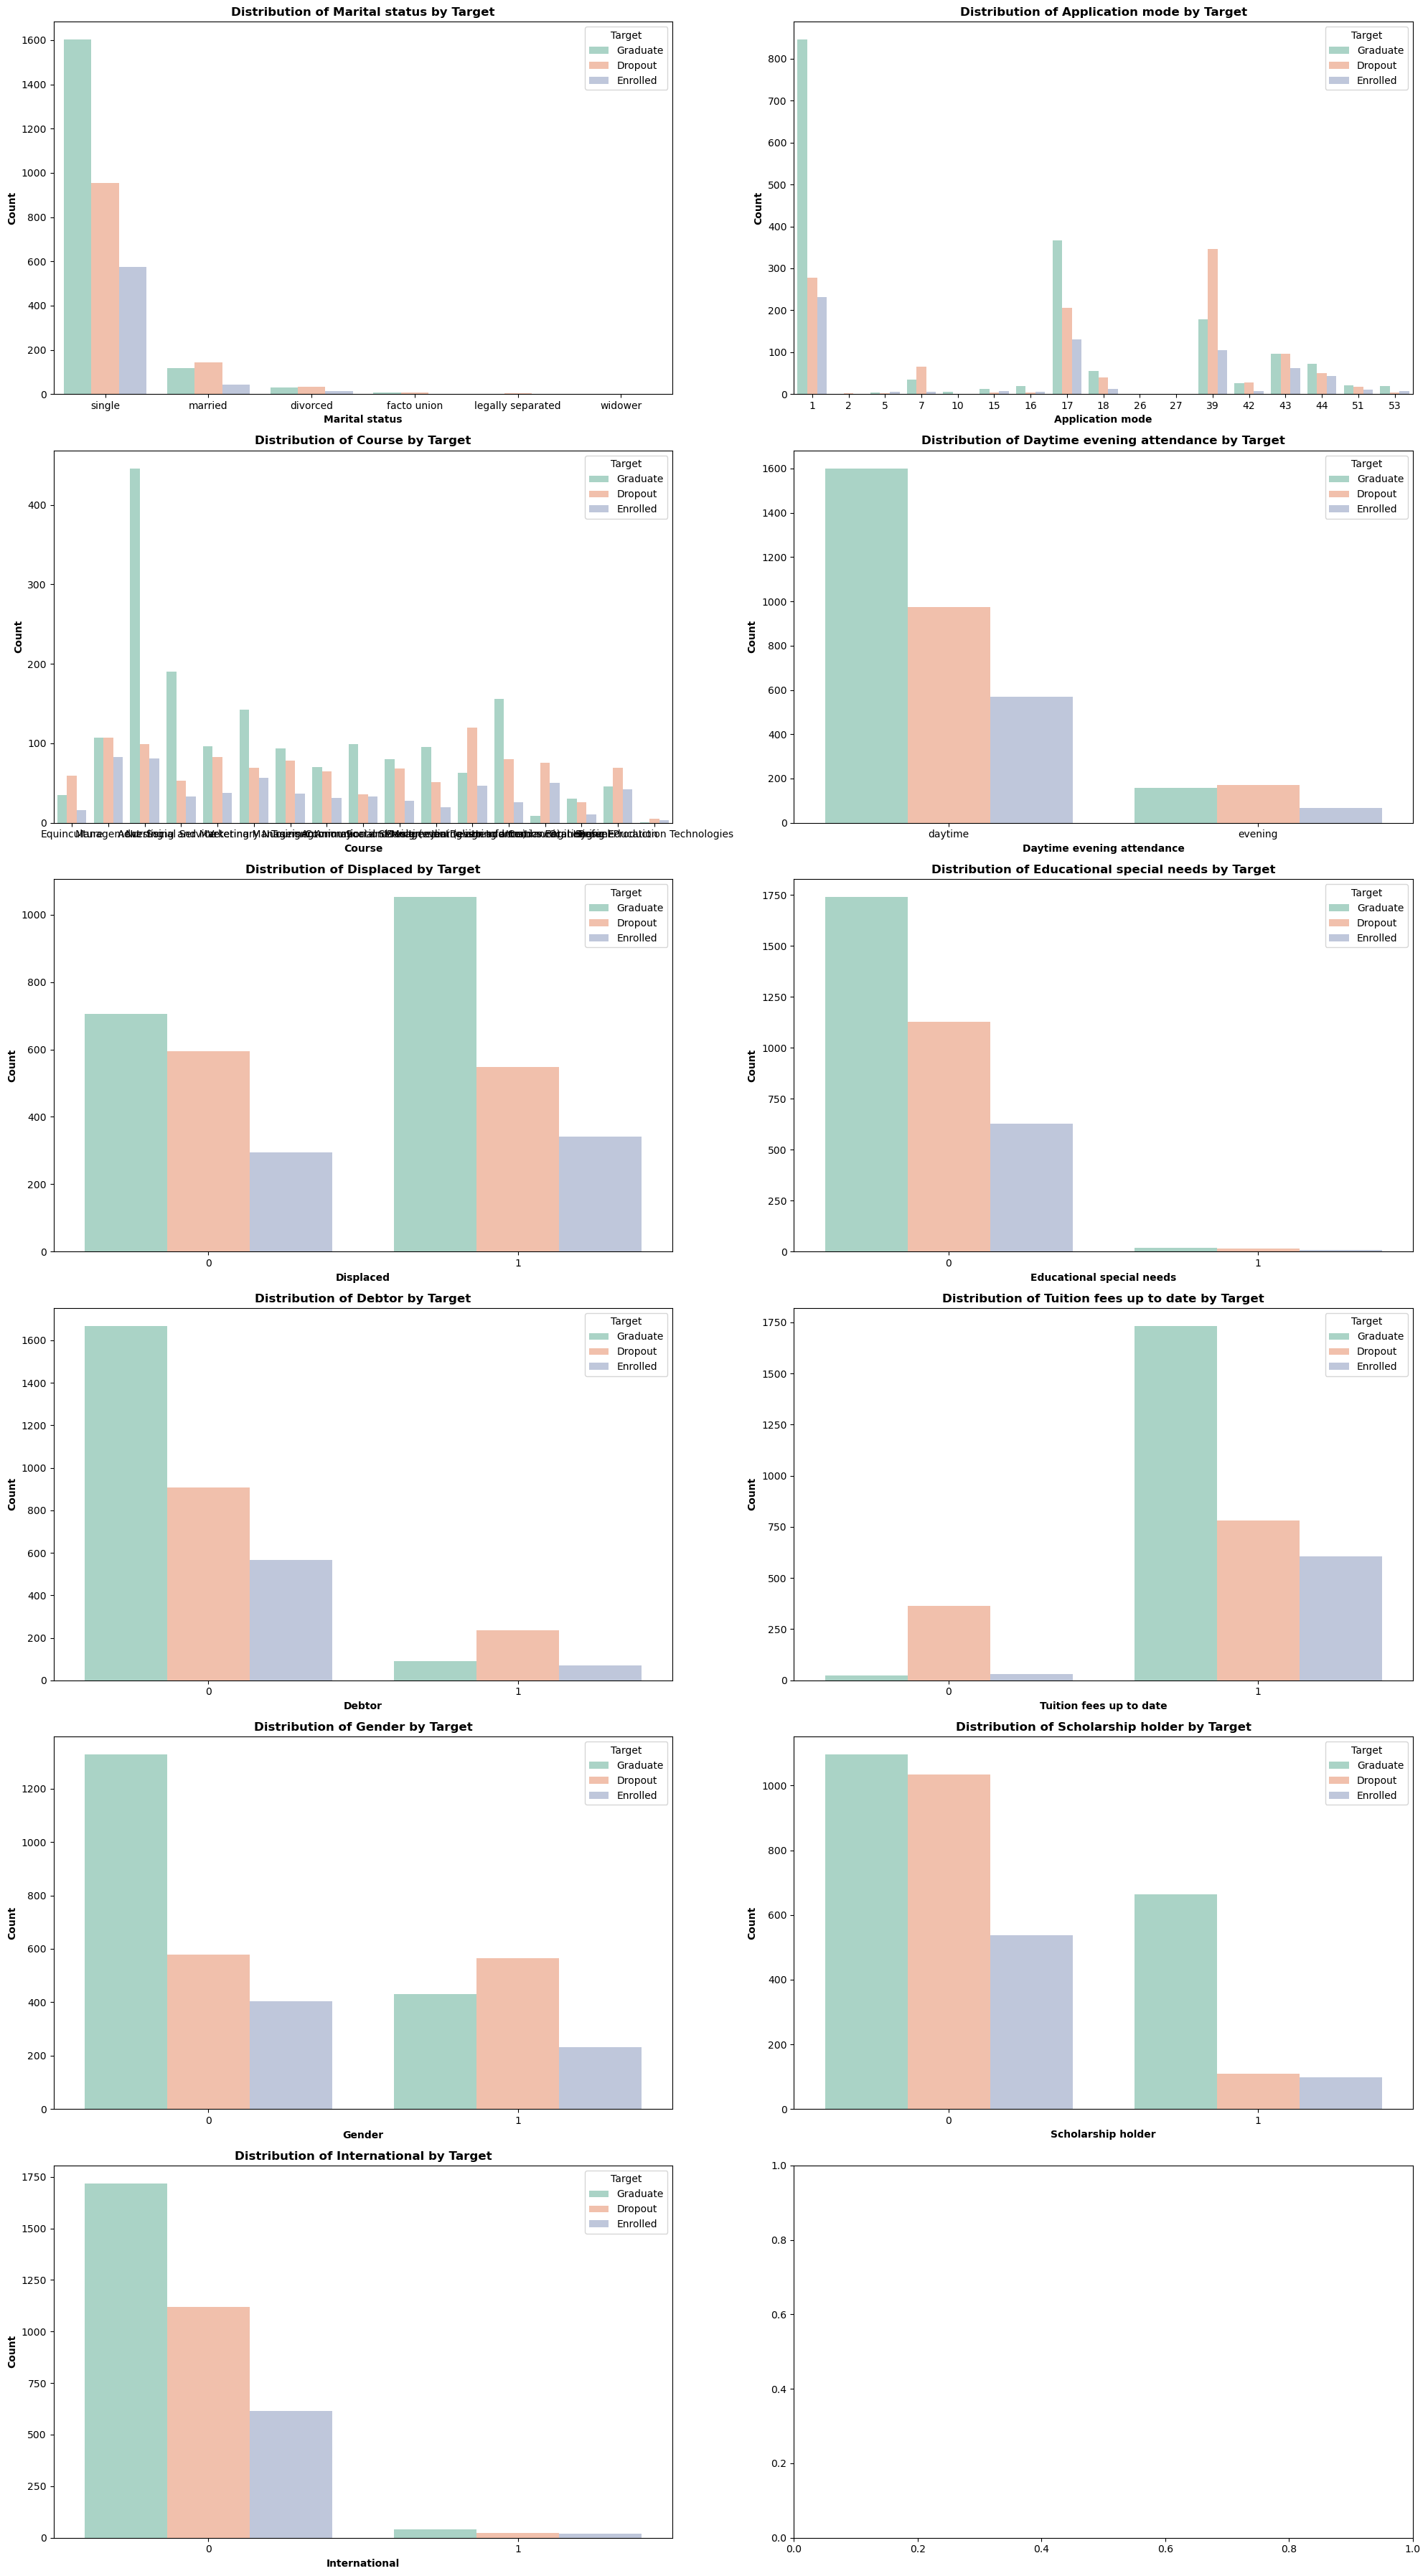

In [19]:
n_features = len(categorical_features[:3] + binary_features)
n_rows = (n_features + 1) // 2  

fig, axes = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))

for i, feat in enumerate(categorical_features[:3] + binary_features):
    row = i // 2
    col = i % 2
    sns.countplot(data=train_df, x=feat, hue="Target", palette="Set2", alpha=0.6, ax=axes[row, col])
    axes[row, col].set_title("Distribution of " + feat + " by Target", fontweight='bold')
    axes[row, col].set_xlabel(feat, fontweight='bold')
    axes[row, col].set_ylabel("Count", fontweight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

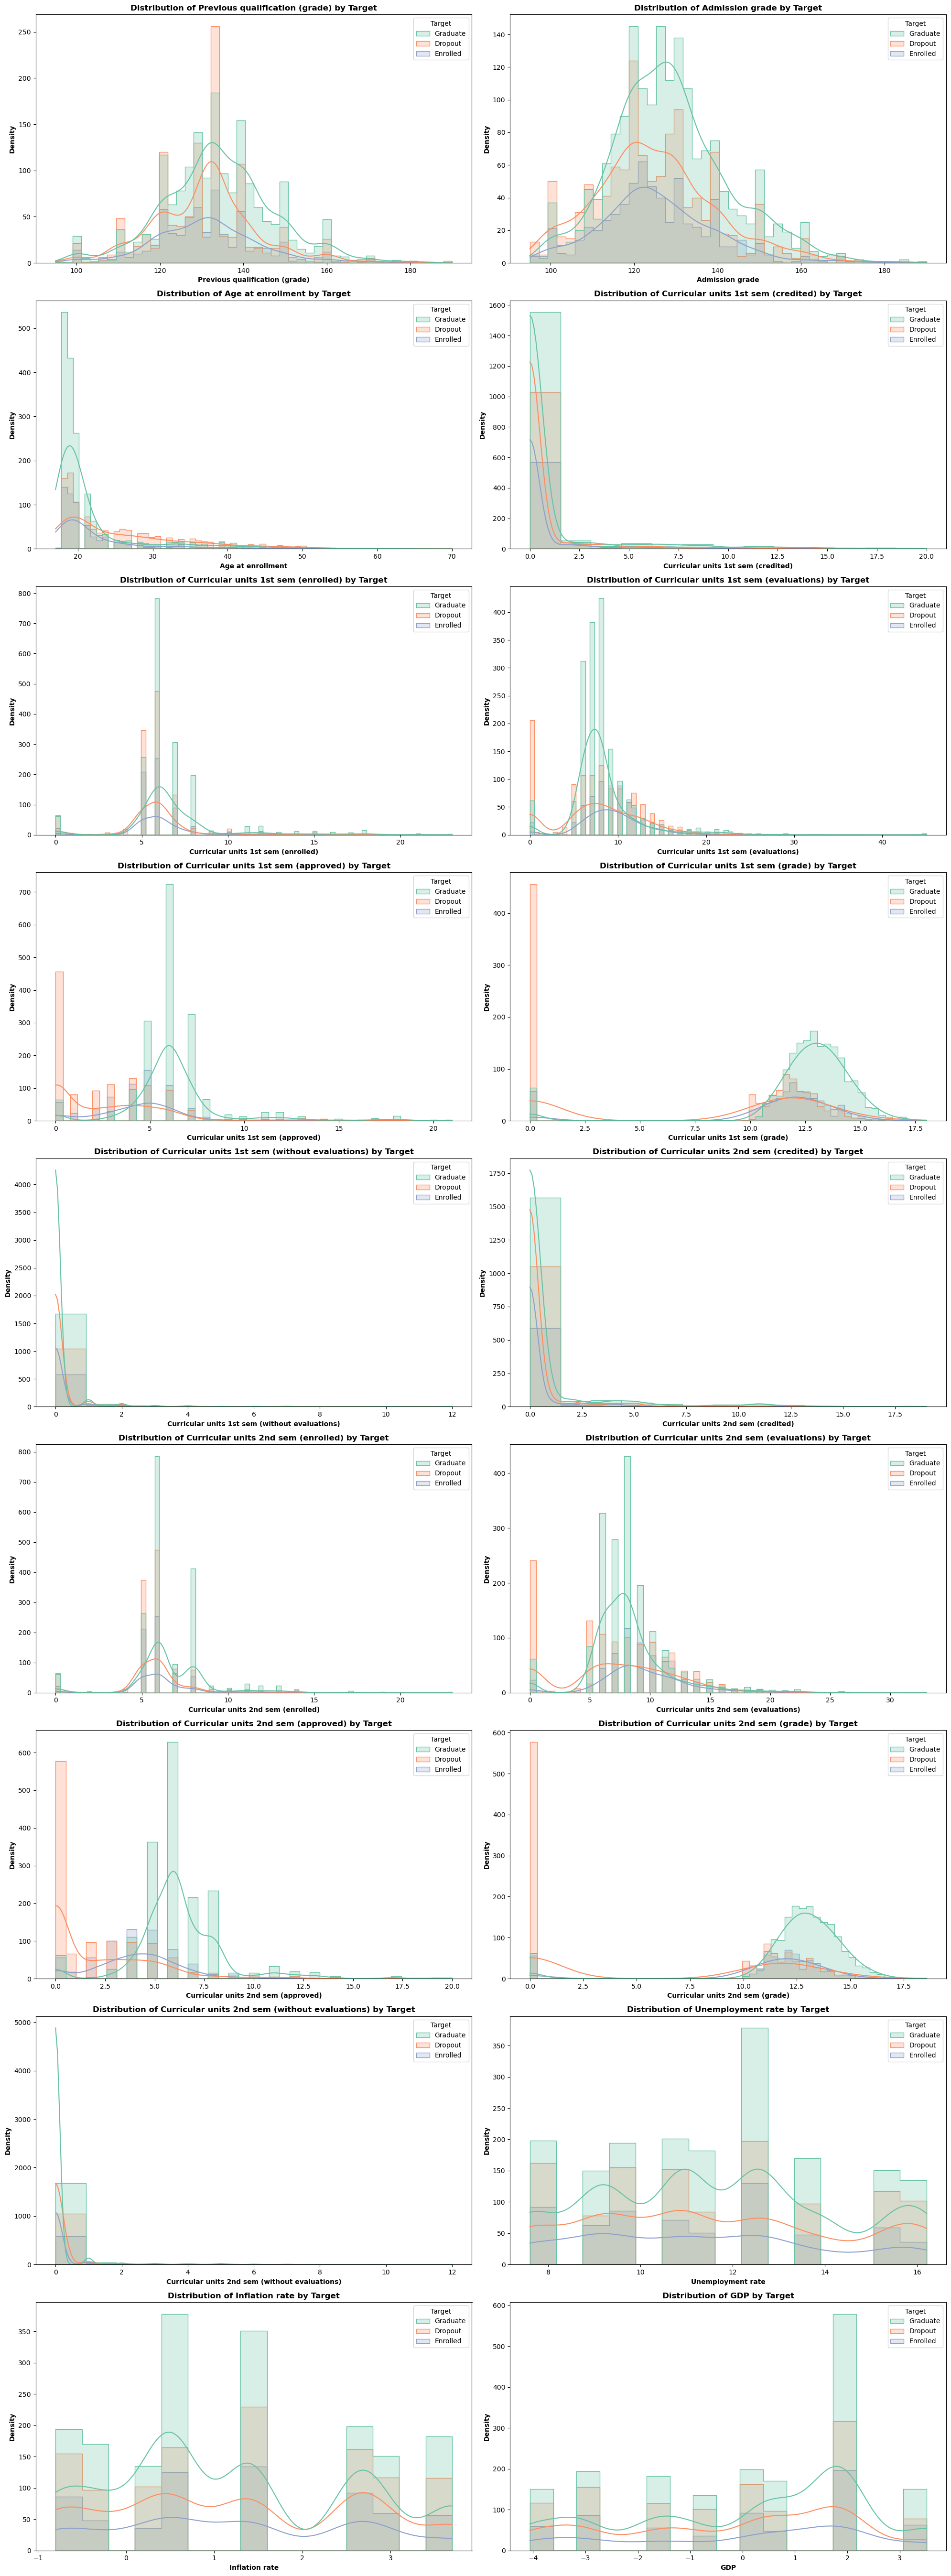

In [20]:
n_features = len(numeric_features)
n_rows = (n_features + 1) // 2  

fig, axes = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))

for i, feat in enumerate(numeric_features):
    row = i // 2
    col = i % 2
    sns.histplot(data=train_df, x=feat, hue="Target", kde=True, palette="Set2", element="step", ax=axes[row, col])
    axes[row, col].set_title("Distribution of " + feat + " by Target", fontweight='bold')
    axes[row, col].set_xlabel(feat, fontweight='bold')
    axes[row, col].set_ylabel("Density", fontweight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Comments Categorical Variable
1. Nationality:
The majority are Portuguese, with a small representation from other nationalities. 

2. Parents' Occupation:
Both mother's and father's occupations are coded numerically. The most common occupation code for mothers and fathers is Unskilled Workers. Be careful about the matrix sparsity issue.

3. Debtor, Tuition Fees Up to Date, Scholarship Holder:
There's a notable number of students who are debtors (397) or whose tuition fees are not up to date (419), while 871 are scholarship holders. These figures highlight the financial aspects and challenges faced by the student population.

### Comments Numeric Variable:
1. Previous Qualification (Grade) and Admission Grade:
- Both these variables have similar ranges (min 95 to max 190), indicating a possible correlation between previous academic performance and admission grades.
- The mean and median values are close, suggesting a relatively symmetric distribution for these variables.

2. Age at Enrollment:
- The age range is quite broad (17 to 70 years), indicating a diverse set of students in terms of age. Transformation technique like Standardization is required

3. Curricular Units Credited (1st and 2nd Semesters):
- The mean values for credited curricular units in both semesters are low (around 0.71 for the 1st semester and 0.54 for the 2nd), the 75% percentile is 0, suggesting that most students do not have many, if any, units credited. This could be because they are first year students.

## EDA - Bivariate Analysis:

In [21]:
numeric_subset = train_df.loc[:, numeric_features]
numeric_subset.corr('spearman').style.background_gradient(cmap='viridis')

In [22]:
alt.Chart(numeric_subset).mark_point(opacity=0.3, size=5).encode(
     alt.X(alt.repeat('row'), type='quantitative', scale=alt.Scale(zero=False)),
     alt.Y(alt.repeat('column'), type='quantitative', scale=alt.Scale(zero=False))
).properties(
    width=150,
    height=150
).repeat(
    column=list(numeric_subset.columns),
    row=list(numeric_subset.columns)
)

alt.RepeatChart(...)

In [23]:
corr_df = get_high_correlations(numeric_subset)
corr_df

Variable 1  \
0           Previous qualification (grade)   
1      Curricular units 1st sem (credited)   
2      Curricular units 1st sem (enrolled)   
3      Curricular units 1st sem (enrolled)   
4      Curricular units 1st sem (enrolled)   
5   Curricular units 1st sem (evaluations)   
6      Curricular units 1st sem (approved)   
7      Curricular units 1st sem (approved)   
8      Curricular units 1st sem (approved)   
9      Curricular units 1st sem (approved)   
10        Curricular units 1st sem (grade)   
11        Curricular units 1st sem (grade)   
12     Curricular units 2nd sem (enrolled)   
13     Curricular units 2nd sem (approved)   

                                Variable 2  Correlation  
0                          Admission grade     0.578391  
1      Curricular units 2nd sem (credited)     0.913871  
2      Curricular units 1st sem (approved)     0.709332  
3      Curricular units 2nd sem (enrolled)     0.963011  
4      Curricular units 2nd sem (approved)     0.658495  
5   Curricular units 2nd sem (evaluations)     0.697713  
6         Curricular units 1st sem (grade)     0.636252  
7      Curricular units 2nd sem (enrolled)     0.701888  
8      Curricular units 2nd sem (approved)     0.895914  
9         Curricular units 2nd sem (grade)     0.659513  
10     Curricular units 2nd sem (approved)     0.626483  
11        Curricular units 2nd sem (grade)     0.760530  
12     Curricular units 2nd sem (approved)     0.681701  
13        Curricular units 2nd sem (grade)     0.688752

### Comments
The correlation analysis reveals key insights: 
- Students' past academic performance strongly correlated to their future success, as evidenced by the moderate correlation between previous qualification grades and admission grades (0.5784).
- Extremely high correlations in curricular units credited and enrolled across semesters (0.9139 and 0.9630, respectively) suggest consistent course loads and academic performance among students.
- Furthermore, the strong correlation between the number of enrolled and approved units in both semesters (0.7093 and 0.6585) indicates effective course management and student capability. 

## Feature Engineering - Column Transform and Pipeline Build Up

In [24]:
numeric_features = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 
       'Unemployment rate',
       'Inflation rate', 
       'GDP']
categorical_features = ['Marital status', 
                        'Application mode', 
                        'Course', 
                        'Nacionality', 
                        "Mother's occupation", 
                        "Father's occupation"]
ordinal_features = ['Application order', 
                    'Previous qualification', 
                    "Mother's qualification", 
                    "Father's qualification"]
binary_features = ['Daytime evening attendance', 
                   'Displaced', 
                   'Educational special needs', 
                   'Debtor', 
                   'Tuition fees up to date', 
                   'Gender', 
                   'Scholarship holder', 
                   'International']

target = "Target"


In [25]:
ordinal_transformer = OrdinalEncoder(dtype=np.int64, handle_unknown='use_encoded_value', unknown_value=-1)
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype = int, min_frequency=10)
numeric_transformer = StandardScaler()

In [26]:
preprocessor = make_column_transformer(
    ( numeric_transformer, numeric_features),  
    ( categorical_transformer, categorical_features+binary_features),  
    ( ordinal_transformer, ordinal_features)
)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Previous qualification (grade)',
                                  'Admission grade', 'Age at enrollment',
                                  'Curricular units 1st sem (credited)',
                                  'Curricular units 1st sem (enrolled)',
                                  'Curricular units 1st sem (evaluations)',
                                  'Curricular units 1st sem (approved)',
                                  'Curricular units 1st sem (grade)',
                                  'Curricular units 1st sem (without '
                                  'evaluations)',...
                                  'Daytime evening attendance', 'Displaced',
                                  'Educational special needs', 'Debtor',
                                  'Tuition fees up to date', 'Gender',
                                  'Scholarship holder', 'International']),
                                ('ordinalencoder',
                                 OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Application order', 'Previous qualification',
                                  "Mother's qualification",
                                  "Father's qualification"])])

In [27]:
X_train = train_df.drop(columns=["Target"])
X_test = test_df.drop(columns=["Target"])
y_train = train_df["Target"]
y_test = test_df["Target"]

In [28]:
preprocessor.verbose_feature_names_out = False

X_train_enc = pd.DataFrame(preprocessor.fit_transform(X_train))

column_name = numeric_features + preprocessor.named_transformers_['onehotencoder'].get_feature_names_out().tolist() + ordinal_features

X_train_enc.columns = column_name

X_train_enc.head()

Previous qualification (grade)  Admission grade  Age at enrollment  \
0                       -0.040300         0.245415          -0.694386   
1                       -0.575696        -0.818901          -0.300945   
2                        0.342125         0.399461          -0.694386   
3                        0.265640         0.238413          -0.694386   
4                       -1.799457        -1.302045          -0.300945   

   Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  \
0                            -0.299361                            -0.109831   
1                            -0.299361                            -0.509720   
2                            -0.299361                             0.290058   
3                            -0.299361                             0.290058   
4                            -0.299361                            -0.109831   

   Curricular units 1st sem (evaluations)  \
0                               -0.541173   
1                               -0.541173   
2                               -0.305455   
3                               -0.305455   
4                                1.580293   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                             0.416328                          0.593152   
1                            -1.513450                         -2.191899   
2                             0.737958                          0.666830   
3                             0.416328                          0.407482   
4                            -0.870191                         -0.025749   

   Curricular units 1st sem (without evaluations)  \
0                                       -0.198645   
1                                       -0.198645   
2                                       -0.198645   
3                                       -0.198645   
4                                       -0.198645   

   Curricular units 2nd sem (credited)  ...  Gender_0  Gender_1  \
0                            -0.279561  ...       0.0       1.0   
1                            -0.279561  ...       1.0       0.0   
2                            -0.279561  ...       1.0       0.0   
3                            -0.279561  ...       1.0       0.0   
4                            -0.279561  ...       1.0       0.0   

   Scholarship holder_0  Scholarship holder_1  International_0  \
0                   1.0                   0.0              1.0   
1                   1.0                   0.0              1.0   
2                   0.0                   1.0              1.0   
3                   0.0                   1.0              1.0   
4                   0.0                   1.0              1.0   

   International_1  Application order  Previous qualification  \
0              0.0                1.0                     0.0   
1              0.0                2.0                     0.0   
2              0.0                5.0                     0.0   
3              0.0                5.0                     0.0   
4              0.0                1.0                     0.0   

   Mother's qualification  Father's qualification  
0                    12.0                    23.0  
1                     0.0                    12.0  
2                     0.0                     0.0  
3                    12.0                    23.0  
4                    12.0                    22.0  

[5 rows x 105 columns]

## Model Build up and Parameter tunning

In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [30]:

models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression_L1": LogisticRegression(penalty='l1', max_iter=2000, solver='liblinear', multi_class="ovr", random_state=123),
    "LogisticRegression_L2": LogisticRegression(penalty='l2', max_iter=2000, multi_class="ovr", random_state=123),
    "NaiveBayes": GaussianNB(),
    "SVC": OneVsRestClassifier(SVC(probability=True))
}


score_types_class = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='weighted'),
    "recall": make_scorer(recall_score, average='weighted'),
    "f1": make_scorer(f1_score, average='weighted'),
    "roc_auc": "roc_auc_ovr"
}

cv_results = {}
for model_name, model in models.items():
    model_pipe = make_pipeline(preprocessor, model)
    scores = cross_validate(model_pipe, X_train, y_train, scoring=score_types_class, cv=5, return_train_score=True)
    cv_results[model_name] = pd.DataFrame(scores).mean()

results_df = pd.DataFrame(cv_results)
results_df


RandomForest  LogisticRegression_L1  LogisticRegression_L2  \
fit_time             0.265830               0.240299               3.854873   
score_time           0.034494               0.016258               0.029024   
test_accuracy        0.762364               0.765754               0.767732   
train_accuracy       1.000000               0.789983               0.790407   
test_precision       0.743638               0.746396               0.749600   
train_precision      1.000000               0.777990               0.778331   
test_recall          0.762364               0.765754               0.767732   
train_recall         1.000000               0.789983               0.790407   
test_f1              0.743569               0.744278               0.747311   
train_f1             1.000000               0.772111               0.772886   
test_roc_auc         0.882712               0.875109               0.873849   
train_roc_auc        1.000000               0.897862               0.898205   

                 NaiveBayes       SVC  
fit_time           0.016294  3.826088  
score_time         0.016178  0.614456  
test_accuracy      0.427565  0.722238  
train_accuracy     0.444394  0.727465  
test_precision     0.664376  0.598113  
train_precision    0.692232  0.732685  
test_recall        0.427565  0.722238  
train_recall       0.444394  0.727465  
test_f1            0.412664  0.649933  
train_f1           0.431120  0.655282  
test_roc_auc       0.762250  0.859074  
train_roc_auc      0.792635  0.910786

## Comments:
**Random Forest:**
- Overfitting: The train accuracy is 1.0, indicating a perfect fit on the training data, but the test accuracy is significantly lower (0.764). This is a clear sign of overfitting. The model has learned the training data too well, including its noise and outliers, which reduces its ability to generalize to new data.
- ROC-AUC Score: The test ROC-AUC score is quite good at 0.88, suggesting that the model's ability to distinguish between classes is strong.

**Logistic Regression (Both L1 and L2 regularization):**
- Both models show good consistency between training and test accuracy (around 0.79 and 0.76, respectively). This suggests that these models are not overfitting and are generalizing well.
- Performance: The ROC-AUC scores are also commendable for both models, indicating a good ability to separate classes.

**Naive Bayes:**
- Underperforming: This model has significantly lower accuracy and F1 scores compared to others, indicating that it may not be suitable for this particular dataset.

**SVC (Support Vector Classifier):**
- Decent Performance: The test ROC-AUC score is good, but accuracy and F1 score are lower than Logistic Regression models.


In [31]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [32]:

param_dist_rf = {
    "randomforestclassifier__n_estimators": randint(100, 500),   
    "randomforestclassifier__max_depth": randint(3, 20),  
    "randomforestclassifier__min_samples_split": randint(2, 11),  
    "randomforestclassifier__min_samples_leaf": randint(1, 11),  
}


rf_pipe = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))


rf_random_search = RandomizedSearchCV(
    rf_pipe, param_dist_rf, n_iter=100, n_jobs=-1, return_train_score=True, random_state=123
)


rf_random_search.fit(X_train, y_train)


best_search_param_rf = rf_random_search.best_params_
best_search_score_rf = rf_random_search.best_score_

best_search_param_rf, best_search_score_rf




({'randomforestclassifier__max_depth': 19,
  'randomforestclassifier__min_samples_leaf': 1,
  'randomforestclassifier__min_samples_split': 10,
  'randomforestclassifier__n_estimators': 472},
 0.7666031373113098)

In [33]:
param_dist_lr = {
    'logisticregression__C': uniform(0.01, 100.0), 
    'logisticregression__penalty': ['l2', 'l1'],  
}


lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=2000, random_state=123, solver='liblinear', multi_class="ovr"))


lr_random_search = RandomizedSearchCV(
    lr_pipe, param_dist_lr, n_iter=100, n_jobs=-1, cv=5, random_state=123
)


lr_random_search.fit(X_train, y_train)


best_params_lr = lr_random_search.best_params_
best_score_lr = lr_random_search.best_score_

best_params_lr, best_score_lr

({'logisticregression__C': 2.808195504294898,
  'logisticregression__penalty': 'l2'},
 0.7688630243169595)

In [34]:
param_dist_svc = {"svc__C": loguniform(1e-2, 1e2),
              "svc__gamma": loguniform(1e-2, 1e2)}

svc_pipe = make_pipeline(preprocessor, SVC(probability=True, random_state=123)) 

svc_random_search = RandomizedSearchCV(
    svc_pipe, param_dist_svc, n_iter=50, n_jobs=-1, cv=5, random_state=123)


svc_random_search.fit(X_train, y_train)


best_search_param = svc_random_search.best_params_
best_search_score = svc_random_search.best_score_

best_search_param, best_search_score

({'svc__C': 3.1319282717196, 'svc__gamma': 0.029005047452739394},
 0.7309923365217876)

### Comments:
We observe that the results show only marginal improvement despite our efforts in hyperparameter tuning. Let's proceed to evaluate them on our test dataset to gain further insights.

In [35]:

models = {
    "RandomForest": rf_random_search.best_estimator_,
    "LogisticRegression": lr_random_search.best_estimator_,
    "SVC": svc_random_search.best_estimator_
}


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    scores = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1": f1_score(y_test, y_pred, average='weighted'),
        "roc_auc": roc_auc_score(y_test, y_proba, multi_class="ovr")
    }
    return scores


test_results = {model_name: evaluate_model(model, X_test, y_test) for model_name, model in models.items()}


test_results_df = pd.DataFrame(test_results).T
test_results_df


accuracy  precision    recall        f1   roc_auc
RandomForest        0.795480   0.781645  0.795480  0.773768  0.905332
LogisticRegression  0.804520   0.794572  0.804520  0.783475  0.900497
SVC                 0.753672   0.737756  0.753672  0.738276  0.857081

### Comments
**Random Forest**
The Random Forest model exhibits a commendable performance with an accuracy of 79.55%, which signifies its general reliability in making predictions. Its precision of 78.20% suggests a high degree of trustworthiness in its positive predictions - when it predicts a class, it's correct about 78% of the time. The recall, also at 79.55%, indicates the model's effectiveness in identifying the majority of relevant instances. The F1 score of 77.14% is a reflection of the balance between precision and recall, demonstrating a well-rounded model. Notably, the model shines in its ROC AUC score of 90.39%, indicating an excellent capability in distinguishing between classes. This high ROC AUC score suggests that the model is particularly effective in scenarios where the cost of false negatives is high.

**Logistic Regression**
Logistic Regression shows slightly superior performance in several metrics compared to Random Forest. It achieves an accuracy of 80.34%, indicating it's slightly more reliable for prediction on this dataset. The precision of 79.20% is commendable, suggesting that its positive predictions are quite trustworthy. With a recall of 80.34%, the model demonstrates a slightly better ability to identify all relevant cases compared to Random Forest. The F1 score of 78.19% is strong, reflecting a good balance between precision and recall, which is crucial for models used in decision-making scenarios where both types of errors are equally important. The ROC AUC score, while slightly lower than Random Forest at 89.99%, is still very high, showcasing great capability in differentiating between classes.

**SVC (Support Vector Classifier)**
The SVC model, with an accuracy of 75.37%, is somewhat less accurate compared to the other two models, but this may still be acceptable depending on the complexity and nature of the dataset. The precision of 73.78% is lower, suggesting that its positive predictions are less reliable than those of the other models. Its recall of 75.37% indicates a moderate ability to identify relevant cases. The F1 score of 73.83% is lower, which reflects the balance between its precision and recall and is indicative of the model's overall efficacy. The ROC AUC score of 85.75%, while the lowest among the three models, still represents a good ability to differentiate between classes. The SVC model might be particularly beneficial in cases where the data exhibits a significant amount of non-linearity, given its capability to handle complex decision boundaries.


## Reduce feature space dimension based on Feature Importance & PCA

### Method1 Feature Importance Value

In [36]:
train_df_org.head()

Marital status  Application mode  Application order  Course  \
563                1                 1                  1    9130   
509                1                 1                  2    9147   
2995               1                17                  5    9500   
1916               1                17                  5    9500   
3389               1                43                  1    9238   

      Daytime/evening attendance\t  Previous qualification  \
563                              1                       1   
509                              1                       1   
2995                             1                       1   
1916                             1                       1   
3389                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
563                            132.0            1                      19   
509                            125.0            1                       1   
2995                           137.0            1                       1   
1916                           136.0            1                      19   
3389                           109.0            1                      19   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
563                       38  ...                                    0   
509                       19  ...                                    0   
2995                       1  ...                                    0   
1916                      38  ...                                    0   
3389                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
563                                     6   
509                                     5   
2995                                    8   
1916                                    7   
3389                                    6   

      Curricular units 2nd sem (evaluations)  \
563                                        9   
509                                        5   
2995                                       8   
1916                                       7   
3389                                       8   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
563                                     5                              13.2   
509                                     0                               0.0   
2995                                    8                              14.9   
1916                                    6                              12.6   
3389                                    5                              12.4   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
563                                                0                8.9   
509                                                0               15.5   
2995                                               0               13.9   
1916                                               0                7.6   
3389                                               0               10.8   

      Inflation rate   GDP    Target  
563              1.4  3.51  Graduate  
509              2.8 -4.06   Dropout  
2995            -0.3  0.79  Graduate  
1916             2.6  0.32  Graduate  
3389             1.4  1.74  Enrolled  

[5 rows x 37 columns]

In [37]:
X_train_new = train_df_org.drop(columns = ['Target'])
y_train_new = train_df_org['Target']

                                           feature  importance
30             Curricular units 2nd sem (approved)    0.150843
31                Curricular units 2nd sem (grade)    0.091830
24             Curricular units 1st sem (approved)    0.089915
25                Curricular units 1st sem (grade)    0.067837
12                                 Admission grade    0.044475
16                         Tuition fees up to date    0.040033
29          Curricular units 2nd sem (evaluations)    0.040025
6                   Previous qualification (grade)    0.038404
19                               Age at enrollment    0.038358
23          Curricular units 1st sem (evaluations)    0.035133
3                                           Course    0.034603
11                             Father's occupation    0.029859
10                             Mother's occupation    0.026861
35                                             GDP    0.023918
33                               Unemployment rate    0

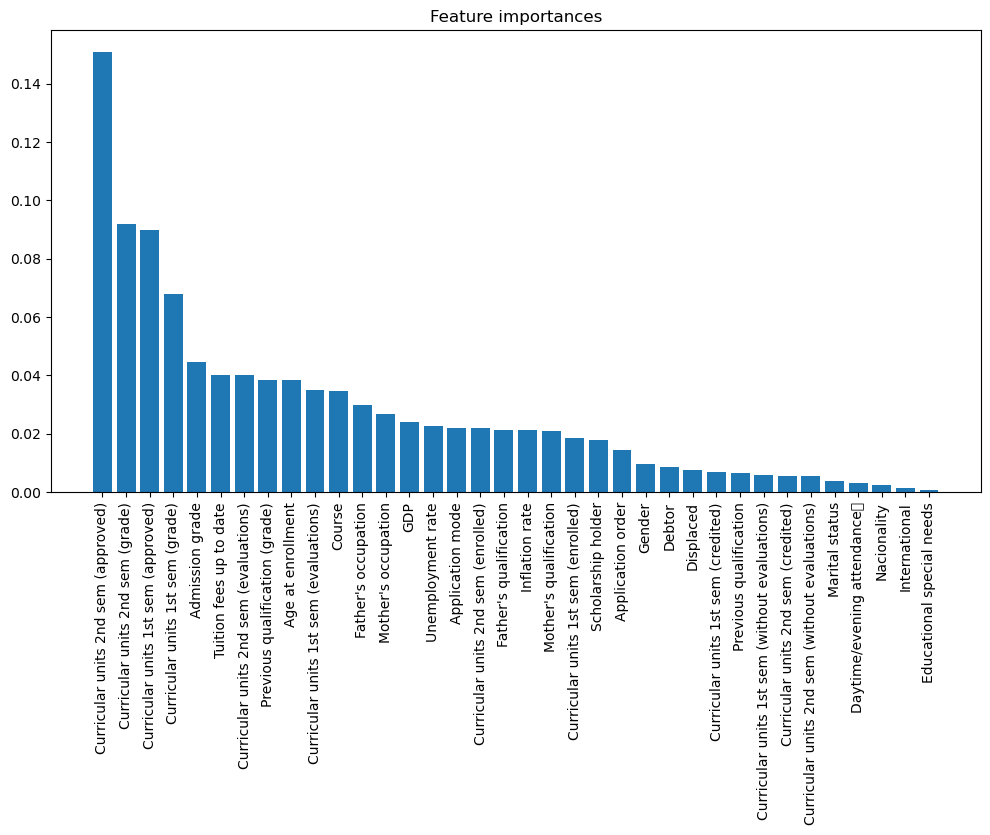

In [38]:

rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train_new, y_train_new)

importances = rf.feature_importances_

feature_importances = pd.DataFrame({'feature': X_train_new.columns, 'importance': importances})

feature_importances = feature_importances.sort_values(by='importance', ascending=False)


print(feature_importances)


plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation='vertical')
plt.show()


In [39]:
new_columns = list(feature_importances.query('importance >= 0.01')['feature'])

In [40]:
drop_columns = []

for i in train_df_org.columns:
    if i not in new_columns:
        drop_columns.append(i)

In [41]:
drop_columns = drop_columns[:-1]
drop_columns

['Marital status',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Nacionality',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Gender',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (without evaluations)']

In [42]:
len(drop_columns)

13

In [43]:
numeric_features_new = ['Previous qualification (grade)', 
       'Admission grade', 
       'Age at enrollment', 
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 
       'Unemployment rate',
       'Inflation rate', 
       'GDP']
categorical_features_new = [ 
                        'Application mode', 
                        'Course', 
                        "Mother's occupation", 
                        "Father's occupation"]

ordinal_features_new = ['Application order', 
                    "Mother's qualification", 
                    "Father's qualification"]

binary_features_new = [ 
                   'Tuition fees up to date', 
                   'Scholarship holder']



target = "Target"


In [44]:
corr_df

Variable 1  \
0           Previous qualification (grade)   
1      Curricular units 1st sem (credited)   
2      Curricular units 1st sem (enrolled)   
3      Curricular units 1st sem (enrolled)   
4      Curricular units 1st sem (enrolled)   
5   Curricular units 1st sem (evaluations)   
6      Curricular units 1st sem (approved)   
7      Curricular units 1st sem (approved)   
8      Curricular units 1st sem (approved)   
9      Curricular units 1st sem (approved)   
10        Curricular units 1st sem (grade)   
11        Curricular units 1st sem (grade)   
12     Curricular units 2nd sem (enrolled)   
13     Curricular units 2nd sem (approved)   

                                Variable 2  Correlation  
0                          Admission grade     0.578391  
1      Curricular units 2nd sem (credited)     0.913871  
2      Curricular units 1st sem (approved)     0.709332  
3      Curricular units 2nd sem (enrolled)     0.963011  
4      Curricular units 2nd sem (approved)     0.658495  
5   Curricular units 2nd sem (evaluations)     0.697713  
6         Curricular units 1st sem (grade)     0.636252  
7      Curricular units 2nd sem (enrolled)     0.701888  
8      Curricular units 2nd sem (approved)     0.895914  
9         Curricular units 2nd sem (grade)     0.659513  
10     Curricular units 2nd sem (approved)     0.626483  
11        Curricular units 2nd sem (grade)     0.760530  
12     Curricular units 2nd sem (approved)     0.681701  
13        Curricular units 2nd sem (grade)     0.688752

In [45]:
### Based on correlation dataframe, I drop columns with spearman correlation greater than 0.8
drop_columns_new = drop_columns + ['Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)']

In [46]:
drop_columns_new.remove('Daytime/evening attendance\t')

In [47]:
drop_features = drop_columns_new + ['Daytime evening attendance']

In [48]:
preprocessor_new = make_column_transformer(
    ( numeric_transformer, numeric_features_new),  
    ( categorical_transformer, categorical_features_new+binary_features_new),  
    ( ordinal_transformer, ordinal_features_new),
    ("drop", drop_features)
)
preprocessor_new

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Previous qualification (grade)',
                                  'Admission grade', 'Age at enrollment',
                                  'Curricular units 1st sem (evaluations)',
                                  'Curricular units 1st sem (grade)',
                                  'Curricular units 2nd sem (enrolled)',
                                  'Curricular units 2nd sem (evaluations)',
                                  'Curricular units 2nd sem (approved)',
                                  'Curricular units 2nd sem (grade)',
                                  'Unemploymen...
                                 ['Marital status', 'Previous qualification',
                                  'Nacionality', 'Displaced',
                                  'Educational special needs', 'Debtor',
                                  'Gender', 'International',
                                  'Curricular units 1st sem (credited)',
                                  'Curricular units 1st sem (without '
                                  'evaluations)',
                                  'Curricular units 2nd sem (credited)',
                                  'Curricular units 2nd sem (without '
                                  'evaluations)',
                                  'Curricular units 1st sem (enrolled)',
                                  'Curricular units 1st sem (approved)',
                                  'Daytime evening attendance'])])

In [49]:
preprocessor_new.verbose_feature_names_out = False

X_train_enc_new = pd.DataFrame(preprocessor_new.fit_transform(X_train))

column_name = numeric_features_new + preprocessor_new.named_transformers_['onehotencoder'].get_feature_names_out().tolist() + ordinal_features_new

X_train_enc_new.columns = column_name

X_train_enc_new.head()

Previous qualification (grade)  Admission grade  Age at enrollment  \
0                       -0.040300         0.245415          -0.694386   
1                       -0.575696        -0.818901          -0.300945   
2                        0.342125         0.399461          -0.694386   
3                        0.265640         0.238413          -0.694386   
4                       -1.799457        -1.302045          -0.300945   

   Curricular units 1st sem (evaluations)  Curricular units 1st sem (grade)  \
0                               -0.541173                          0.593152   
1                               -0.541173                         -2.191899   
2                               -0.305455                          0.666830   
3                               -0.305455                          0.407482   
4                                1.580293                         -0.025749   

   Curricular units 2nd sem (enrolled)  \
0                            -0.104250   
1                            -0.554728   
2                             0.796706   
3                             0.346228   
4                            -0.104250   

   Curricular units 2nd sem (evaluations)  \
0                                0.234793   
1                               -0.770569   
2                               -0.016548   
3                               -0.267888   
4                               -0.016548   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.181829                          0.571300   
1                            -1.474949                         -1.966330   
2                             1.175896                          0.898116   
3                             0.513185                          0.455953   
4                             0.181829                          0.417504   

   Unemployment rate  ...  Father's occupation_99  Father's occupation_193  \
0          -1.005346  ...                     0.0                      0.0   
1           1.484108  ...                     0.0                      0.0   
2           0.880604  ...                     0.0                      0.0   
3          -1.495693  ...                     0.0                      0.0   
4          -0.288685  ...                     0.0                      0.0   

   Father's occupation_infrequent_sklearn  Tuition fees up to date_0  \
0                                     0.0                        0.0   
1                                     0.0                        0.0   
2                                     0.0                        0.0   
3                                     0.0                        0.0   
4                                     0.0                        0.0   

   Tuition fees up to date_1  Scholarship holder_0  Scholarship holder_1  \
0                        1.0                   1.0                   0.0   
1                        1.0                   1.0                   0.0   
2                        1.0                   0.0                   1.0   
3                        1.0                   0.0                   1.0   
4                        1.0                   0.0                   1.0   

   Application order  Mother's qualification  Father's qualification  
0                1.0                    12.0                    23.0  
1                2.0                     0.0                    12.0  
2                5.0                     0.0                     0.0  
3                5.0                    12.0                    23.0  
4                1.0                    12.0                    22.0  

[5 rows x 79 columns]

In [50]:
print("new column number after preprocessing is {}".format(X_train_enc_new.shape[1]))

new column number after preprocessing is 79


In [51]:
param_dist_rf_new = {
    "randomforestclassifier__n_estimators": randint(50, 200),   
    "randomforestclassifier__max_depth": randint(5, 15),
    "randomforestclassifier__min_samples_split": randint(5, 10),  
    "randomforestclassifier__min_samples_leaf": randint(5, 10), 
    
}


rf_pipe_new = make_pipeline(preprocessor_new, RandomForestClassifier(random_state=123))


rf_random_search_new = RandomizedSearchCV(
    rf_pipe_new, param_dist_rf_new, n_iter=100, n_jobs=-1, return_train_score=True, random_state=123
)


rf_random_search_new.fit(X_train, y_train)


best_search_param_rf_new = rf_random_search_new.best_params_
best_search_score_rf_new = rf_random_search_new.best_score_

best_search_param_rf_new, best_search_score_rf_new

({'randomforestclassifier__max_depth': 14,
  'randomforestclassifier__min_samples_leaf': 5,
  'randomforestclassifier__min_samples_split': 6,
  'randomforestclassifier__n_estimators': 118},
 0.7572791056345344)

In [52]:
param_dist_lr = {
    'logisticregression__C': uniform(0.01, 100.0), 
    'logisticregression__penalty': ['l2', 'l1'],  
}


lr_pipe_new = make_pipeline(preprocessor_new, LogisticRegression(max_iter=2000, random_state=123, solver='liblinear', multi_class="ovr"))


lr_random_search_new = RandomizedSearchCV(
    lr_pipe_new, param_dist_lr, n_iter=100, n_jobs=-1, cv=5, random_state=123
)


lr_random_search_new.fit(X_train, y_train)


best_params_lr_new = lr_random_search_new.best_params_
best_score_lr_new = lr_random_search_new.best_score_

best_params_lr_new, best_score_lr_new

({'logisticregression__C': 10.600848505681382,
  'logisticregression__penalty': 'l2'},
 0.7646229392915078)

In [53]:
param_dist_svc = {"svc__C": loguniform(1e-3, 1e1),
              "svc__gamma": loguniform(1e-3, 1e1)}

svc_pipe_new = make_pipeline(preprocessor_new, SVC(probability=True, random_state=123)) 

svc_random_search_new = RandomizedSearchCV(
    svc_pipe_new, param_dist_svc, n_iter=100, n_jobs=-1, cv=5, random_state=123)


svc_random_search_new.fit(X_train, y_train)


best_search_param_new = svc_random_search_new.best_params_
best_search_score_new = svc_random_search_new.best_score_

best_search_param_new, best_search_score_new

({'svc__C': 8.591845063663952, 'svc__gamma': 0.002077127528347042},
 0.7575607923988525)

In [54]:
models = {
    "RandomForest": rf_random_search_new.best_estimator_,
    "LogisticRegression": lr_random_search_new.best_estimator_,
    "SVC": svc_random_search_new.best_estimator_
}


test_results_new = {model_name: evaluate_model(model, X_test, y_test) for model_name, model in models.items()}


test_results_df_new = pd.DataFrame(test_results_new).T
test_results_df_new


accuracy  precision    recall        f1   roc_auc
RandomForest        0.778531   0.757904  0.778531  0.751311  0.895950
LogisticRegression  0.783051   0.766489  0.783051  0.764394  0.894725
SVC                 0.796610   0.787877  0.796610  0.779679  0.891924

### Method2 PCA + Logistic Regression

In [55]:
### We don't drop any feature, only do PCA on numeric variables

numeric_transformer = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95)
)

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int, min_frequency=10)
ordinal_transformer = OrdinalEncoder(dtype=np.int64, handle_unknown='use_encoded_value', unknown_value=-1)


preprocessor_pca = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features + binary_features),
    (ordinal_transformer, ordinal_features)
)
preprocessor_pca

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.95))]),
                                 ['Previous qualification (grade)',
                                  'Admission grade', 'Age at enrollment',
                                  'Curricular units 1st sem (credited)',
                                  'Curricular units 1st sem (enrolled)',
                                  'Curricular units 1st sem (evaluations)',
                                  'Curricular units 1st sem (approved)',
                                  'Curricular unit...
                                  'Daytime evening attendance', 'Displaced',
                                  'Educational special needs', 'Debtor',
                                  'Tuition fees up to date', 'Gender',
                                  'Scholarship holder', 'International']),
                                ('ordinalencoder',
                                 OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Application order', 'Previous qualification',
                                  "Mother's qualification",
                                  "Father's qualification"])])

In [56]:
preprocessor_pca.verbose_feature_names_out = False

X_train_pca = pd.DataFrame(preprocessor_pca.fit_transform(X_train))

X_train_pca.head()

0         1         2         3         4         5         6   \
0  0.090076 -1.472145 -0.567296  0.144756  1.526698  0.472716 -0.043534   
1 -3.030770  2.227554 -0.064097 -0.732350 -2.373726  0.479783 -1.125183   
2  1.162408 -1.679668  0.382634  0.206854 -0.109707 -1.198101 -0.643045   
3  0.357851 -1.115391 -0.107702 -0.131740  0.844853  1.498639 -0.324684   
4  0.015861  0.159978 -2.286566  1.005130 -0.039843  0.142753  0.149000   

         7         8         9   ...   89   90   91   92   93   94   95   96  \
0 -0.053414  0.411067  0.189741  ...  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0   
1 -0.729325  0.032717 -0.056345  ...  1.0  0.0  1.0  0.0  1.0  0.0  2.0  0.0   
2  0.383443  0.537081 -0.327830  ...  1.0  0.0  0.0  1.0  1.0  0.0  5.0  0.0   
3  0.248329 -0.603443 -0.339303  ...  1.0  0.0  0.0  1.0  1.0  0.0  5.0  0.0   
4 -0.697282  0.129718  0.608474  ...  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0   

     97    98  
0  12.0  23.0  
1   0.0  12.0  
2   0.0   0.0  
3  12.0  23.0  
4  12.0  22.0  

[5 rows x 99 columns]

In [57]:
print("new column number after preprocessing with pca is {}".format(X_train_pca.shape[1]))

new column number after preprocessing with pca is 99


In [58]:
param_dist_lr = {
    'logisticregression__C': uniform(0.01, 100.0), 
    'logisticregression__penalty': ['l2', 'l1'],  
}


lr_pipe_pca = make_pipeline(preprocessor_pca, LogisticRegression(max_iter=2000, random_state=123, solver='liblinear', multi_class="ovr"))


lr_random_search_pca = RandomizedSearchCV(
    lr_pipe_pca, param_dist_lr, n_iter=100, n_jobs=-1, cv=5, random_state=123
)


lr_random_search_pca.fit(X_train, y_train)


best_params_lr_pca = lr_random_search_pca.best_params_
best_score_lr_pca = lr_random_search_pca.best_score_

best_params_lr_pca, best_score_lr_pca

({'logisticregression__C': 15.31705151247731,
  'logisticregression__penalty': 'l2'},
 0.7598214785158903)

In [59]:

models = {
    "LogisticRegression": lr_random_search_pca.best_estimator_
}


test_results_pca = {model_name: evaluate_model(model, X_test, y_test) for model_name, model in models.items()}


test_results_df_pca = pd.DataFrame(test_results_pca).T
test_results_df_pca

accuracy        f1  precision    recall  roc_auc
LogisticRegression  0.789831  0.769135   0.773191  0.789831  0.89248

### Comments:

there remains room for improvement in the models' performance. Further refinement through advanced feature engineering could yield more significant insights from the data, potentially enhancing the models' predictive accuracy. Feature engineering, by uncovering more relevant or representative features, can lead to a more nuanced understanding of the factors influencing student academic dropout. Moreover, meticulous parameter tuning, particularly for algorithms like SVM and Random Forest that are sensitive to specific parameter settings, could further optimize the models.


### Reference:

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 10.1038/s41586-020-2649-2. (Publisher link).

Cox, D. R. (1958). The regression analysis of binary sequences. Journal of the Royal Statistical Society: Series B (Methodological), 20(2), 215–232.

Cortes, C., & Vapnik, V. (1995). Support-vector networks. Machine Learning, 20(3), 273-297

Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32. DOI: 10.1023/A:1010933404324

Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), pp.2825–2830.